**Importing libraries**

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import keras

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Reading data**

In [ ]:
tt1 = pd.read_csv('/content/drive/My Drive/azure download/data/AzureReadings_at_a_timestamp.csv')

In [ ]:
tt1.head()

,timestamp,min cpu,max cpu,avg cpu
0,2017-01-01 00:00:00,715146.536821,2.223302e+06,1.229569e+06
1,2017-01-01 00:05:00,700473.840324,2.212393e+06,1.211322e+06
2,2017-01-01 00:10:00,705953.565850,2.213057e+06,1.206635e+06
3,2017-01-01 00:15:00,688383.073221,2.187572e+06,1.190369e+06
4,2017-01-01 00:20:00,688276.551033,2.183684e+06,1.180992e+06


In [ ]:
tt1['timestamp'] =  pd.to_datetime(tt1['timestamp'])

In [ ]:
tt1 = tt1.set_index('timestamp')

In [ ]:
tt1.head()

,min cpu,max cpu,avg cpu
timestamp,,,
2017-01-01 00:00:00,715146.536821,2.223302e+06,1.229569e+06
2017-01-01 00:05:00,700473.840324,2.212393e+06,1.211322e+06
2017-01-01 00:10:00,705953.565850,2.213057e+06,1.206635e+06
2017-01-01 00:15:00,688383.073221,2.187572e+06,1.190369e+06
2017-01-01 00:20:00,688276.551033,2.183684e+06,1.180992e+06


In [ ]:
tt = tt1

In [ ]:
dataset = tt.values
dataset = dataset.astype('float32')

In [ ]:
len(dataset)

8640

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

6912 1728


In [ ]:
def create_training_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :3]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 5
trainX, trainY = create_training_dataset(train, look_back=look_back)
testX, testY = create_training_dataset(test, look_back=look_back)

**Building Model**

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.GRU(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(keras.layers.Dense(3))

In [ ]:
adamOpt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=adamOpt, metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 51,075
Trainable params: 51,075
Non-trainable params: 0
_________________________________________________________________


**Training Model**

In [ ]:
history = model.fit(trainX, trainY, validation_split=0.25,epochs=20, batch_size=64, verbose=2)

Train on 5179 samples, validate on 1727 samples
Epoch 1/20
 - 2s - loss: 0.0056 - mae: 0.0456 - val_loss: 7.2477e-04 - val_mae: 0.0216
Epoch 2/20
 - 1s - loss: 7.9029e-04 - mae: 0.0193 - val_loss: 6.0004e-04 - val_mae: 0.0196
Epoch 3/20
 - 1s - loss: 7.1799e-04 - mae: 0.0179 - val_loss: 5.4436e-04 - val_mae: 0.0185
Epoch 4/20
 - 1s - loss: 6.6740e-04 - mae: 0.0171 - val_loss: 5.1908e-04 - val_mae: 0.0177
Epoch 5/20
 - 1s - loss: 6.4602e-04 - mae: 0.0169 - val_loss: 5.3687e-04 - val_mae: 0.0186
Epoch 6/20
 - 1s - loss: 6.1816e-04 - mae: 0.0165 - val_loss: 4.6823e-04 - val_mae: 0.0168
Epoch 7/20
 - 1s - loss: 5.9289e-04 - mae: 0.0163 - val_loss: 4.8404e-04 - val_mae: 0.0166
Epoch 8/20
 - 1s - loss: 5.6302e-04 - mae: 0.0158 - val_loss: 4.5698e-04 - val_mae: 0.0167
Epoch 9/20
 - 1s - loss: 5.4914e-04 - mae: 0.0156 - val_loss: 4.5813e-04 - val_mae: 0.0168
Epoch 10/20
 - 1s - loss: 5.4753e-04 - mae: 0.0156 - val_loss: 4.4687e-04 - val_mae: 0.0166
Epoch 11/20
 - 1s - loss: 5.2508e-04 - mae: 0

**Predicting**

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
trainY = scaler.inverse_transform(trainY)
trainPredict = scaler.inverse_transform(trainPredict)
testY = scaler.inverse_transform(testY)
testPredict = scaler.inverse_transform(testPredict)

**Evaluating Model**

1. Evaluation metrics: RMSE(Root Mean Square Error)

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[:], trainPredict[:]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:], testPredict[:]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 27252.45 RMSE
Test Score: 28808.21 RMSE


2. Evaluation metrics: MAE(Mean Absolute Error)

In [ ]:
from sklearn.metrics import mean_absolute_error
trainScore = (mean_absolute_error(trainY[:], trainPredict[:]))
print('Train Score: %f MAE' % (trainScore))
testScore = math.sqrt(mean_absolute_error(testY[:], testPredict[:]))
print('Test Score: %f MAE' % (testScore))

Train Score: 16562.000000 MAE
Test Score: 133.156378 MAE


3. Evaluation metric: MAPE(Mean absolute percentage error)

**Percentage errors**

The percentage error is given by  
p
t
=
100
e
t
/
y
t
 . 

Percentage errors have the advantage of being unit-free, and 
so are frequently used to compare forecast performances between data sets. 

The most commonly used measure is:
Mean absolute percentage error: MAPE
=
mean
(
|
p
t
|
)


In [ ]:
trainScore2 = np.mean(np.abs(trainPredict - trainY)/np.abs(trainY))
print('Train Score: %f MAPE' % (trainScore2))
testScore2 = np.mean(np.abs(testPredict - testY)/np.abs(testY))
print('Test Score: %f MAPE' % (testScore2))

Train Score: 0.011486 MAPE
Test Score: 0.011713 MAPE


4. Evaluation metric: Correaltion

In [ ]:
trainScore3 = np.corrcoef(trainPredict, trainY)[0,1]
print('Train Score: %f COR' % (trainScore3))
testScore2 = np.corrcoef(testPredict, testY)[0,1]
print('Test Score: %f COR' % (testScore2))

Train Score: 0.999996 COR
Test Score: 1.000000 COR


**Plotting Graphs**

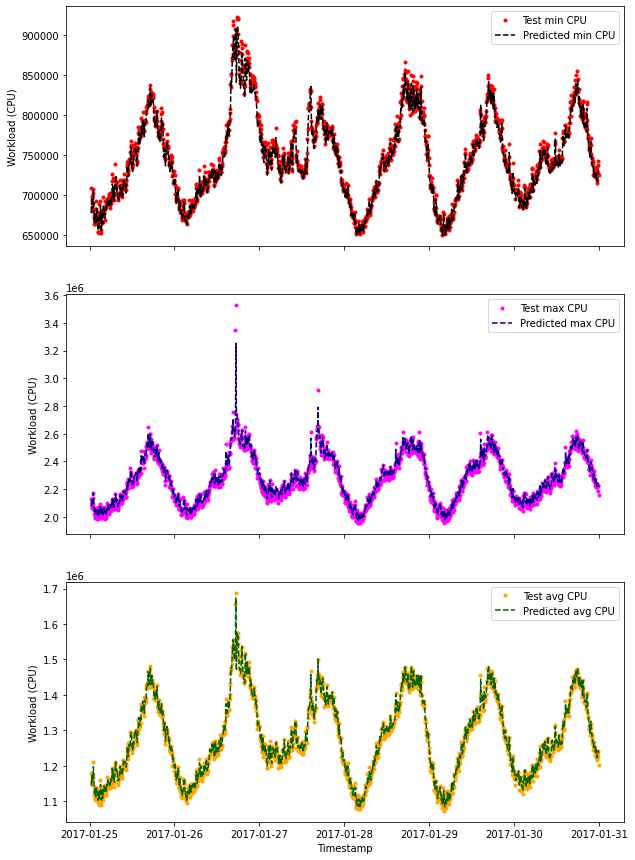

In [ ]:
index=tt.index
TestY= pd.DataFrame(testY,columns=['min_cpu','max_cpu','avg_cpu'])
PredY=pd.DataFrame(testPredict,columns=['min_cpu','max_cpu','avg_cpu'])

x=index[-1722:]
fig, axs = plt.subplots(3,figsize=(10,15))

axs[0].plot(x,TestY.min_cpu,'.',label='Test min CPU',color='red')
axs[0].plot(x,PredY.min_cpu,'--',label='Predicted min CPU',color='black')
axs[0].legend()
axs[1].plot(x,TestY.max_cpu,'.',label='Test max CPU',color='magenta')
axs[1].plot(x,PredY.max_cpu,'--',label='Predicted max CPU',color='navy')
axs[1].legend()
axs[2].plot(x,TestY.avg_cpu,'.',label='Test avg CPU',color='orange')
axs[2].plot(x,PredY.avg_cpu,'--',label='Predicted avg CPU',color='darkgreen')
axs[2].legend()
for ax in axs.flat:
    ax.set(xlabel='Timestamp', ylabel='Workload (CPU)',autoscale_on=True)
for ax in axs:
    ax.label_outer()
#fig.suptitle('Prediction of Workload on Azure cloud at a particular timestamp',fontsize=20)
plt.savefig('/content/drive/My Drive/azure download/data/LSTM output.png', dpi = 300)
plt.show()